# **Laboratorijska vježba 8**: Zadaci za samostalni rad

## **Klasifikacija zrna pšenice**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o zrnima triju različitih sorti pšenice: Kama, Rosa i Kanadska. Za svaku klasu snimljen je popriličan broj slika tehnikom mekih rendgenskih zraka. Iz slika su izvučene značajke koje opisuju oblik zrna.


In [1]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

In [2]:
seeds = pd.read_csv("Data/seeds.csv")
seeds.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## **Zadatak 1: Priprema skupa podataka**

Predobradite skup podataka na način da zadržite samo smislene značajke. Iscrtajte histogram vrijednosti za svaku značajku.

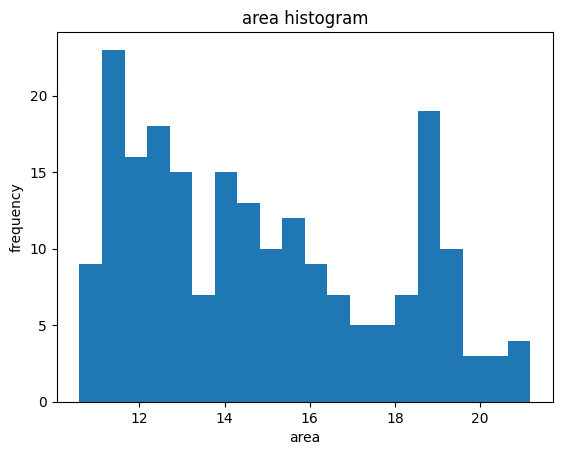

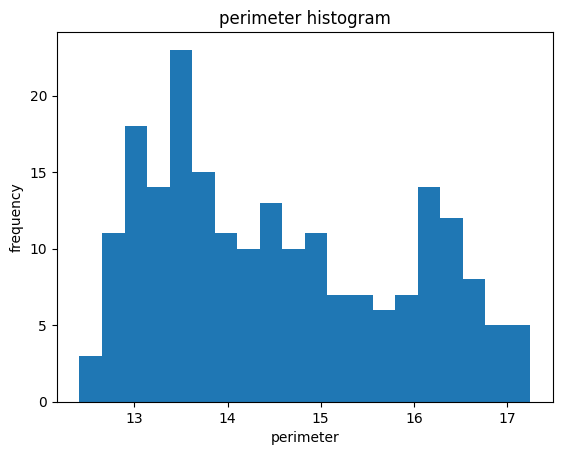

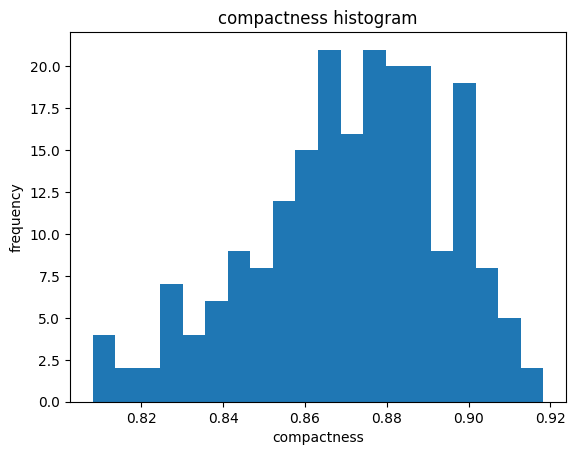

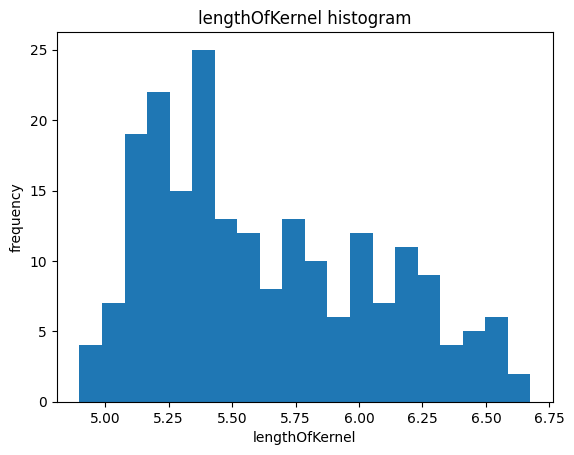

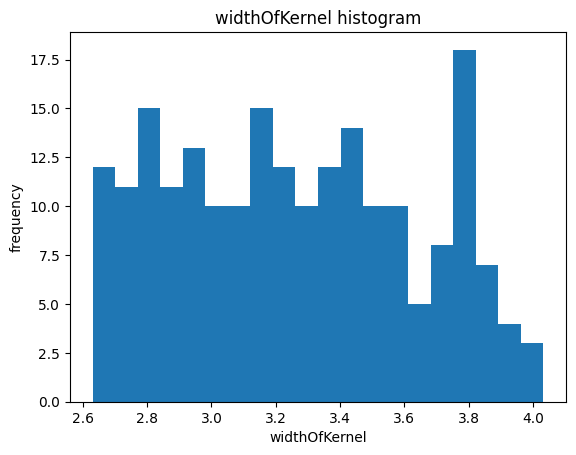

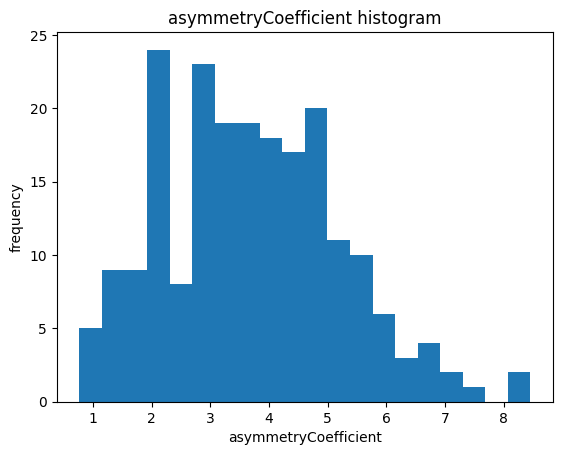

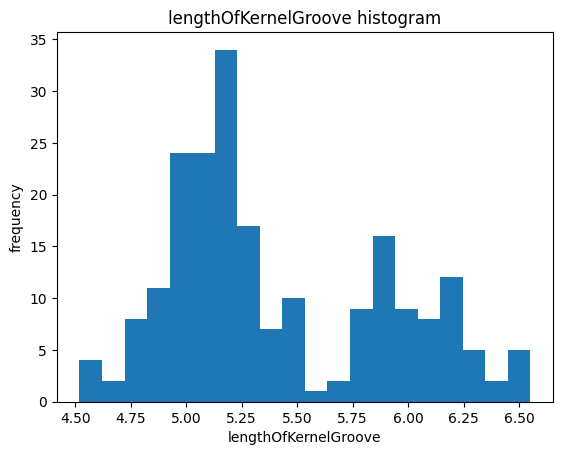

In [3]:
data = seeds.drop("ID", axis=1)

needed_columns = data.columns[:-1]  # Exclude the 'seedType' column

for column in needed_columns:
  plt.hist(data[column], bins=20)
  plt.title(f'{column} histogram')
  plt.ylabel('frequency')
  plt.xlabel(column)
  plt.show()

S obzirom na to da značajke imaju različite intervale vrijednosti, poželjno ih je normalizirati. Normalizirajte značajke prigodnom metodom normalizacije. 

In [4]:
scaler = MinMaxScaler()
data[needed_columns] = scaler.fit_transform(data[needed_columns])
data

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,1
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,1
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,1
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,1
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,1
...,...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821,3
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306,3
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402,3
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493,3


## **Zadatak 2: Grupiranje pomoću algoritma $k$-means**

Pomoću metode lakta pronađite najprikladniju vrijednost za parametar $k$ u algoritmu $k$-means.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

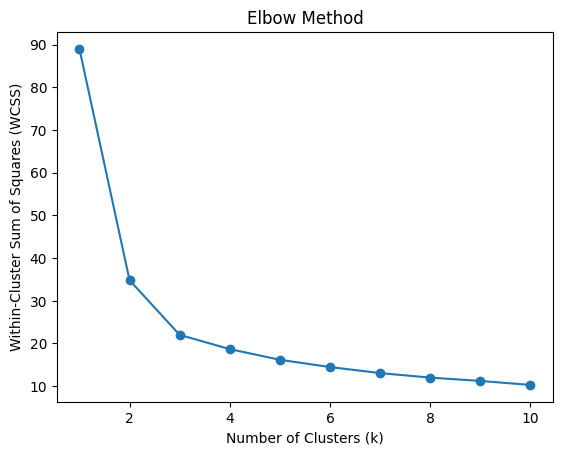

In [5]:
new_data_x = data.drop("seedType", axis=1)
new_data_y = data.seedType

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(new_data_x)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")
plt.show()

## **Zadatak 3: Vizualizacija grupa algoritma $k$-means**

Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente.  

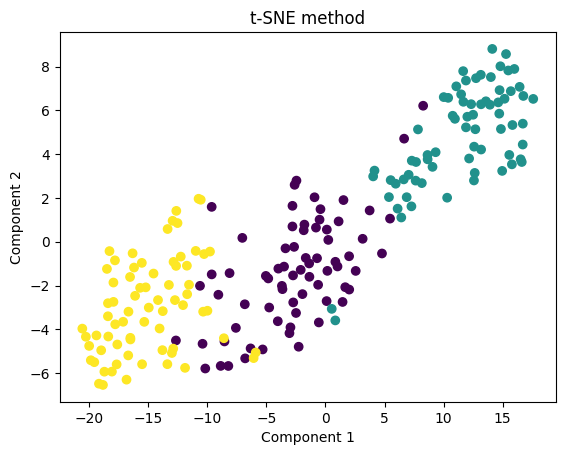

In [6]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(new_data_x)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=new_data_y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("t-SNE method")
plt.show()

Zatim grupirajte skup podataka pomoću algoritma $k$-means, gdje za parametar $k$ koristite najbolju vrijednost iz prošlog zadatka.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


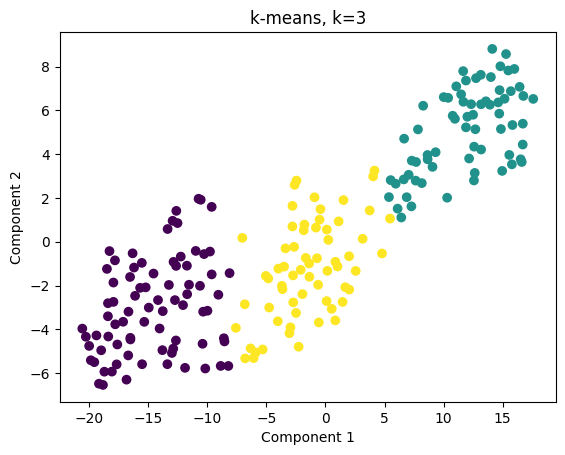

In [7]:
elbow_k = 3
kmeans = KMeans(n_clusters=elbow_k, random_state=42)
kmeans.fit(X_tsne)
labels = kmeans.labels_

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title(f"k-means, k={elbow_k}")
plt.show()

Pomoću dva dijagrama raspršenosti vizualizirajte skup podataka prije (s poznatim oznakama klasa) i nakon grupiranja (s novododanim oznakama grupa). 

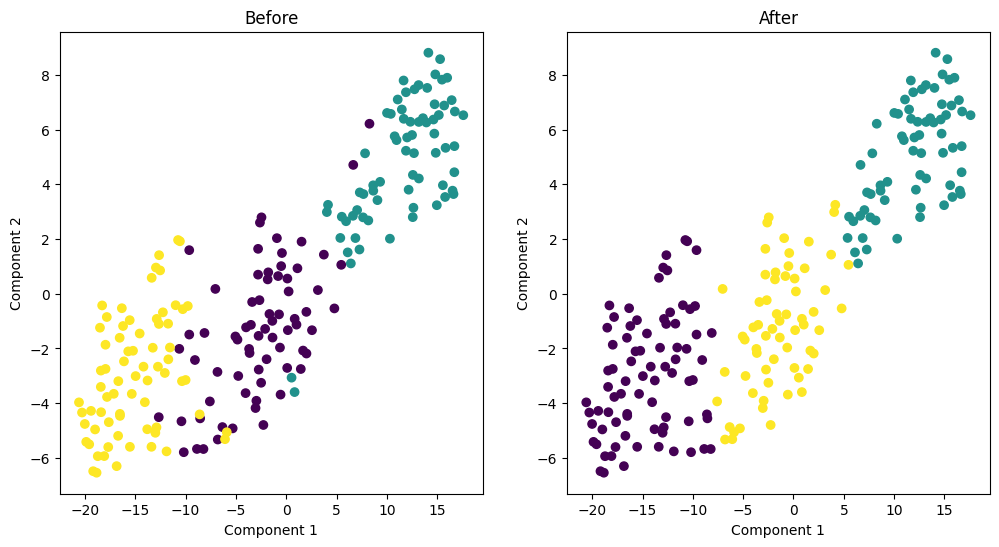

In [8]:
y_poznato = data["seedType"]

# Create two subplots for before and after clustering
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot before clustering with known class labels
axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_poznato)
axs[0].set_xlabel("Component 1")
axs[0].set_ylabel("Component 2")
axs[0].set_title("Before")

# Plot after clustering with cluster labels
axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
axs[1].set_xlabel("Component 1")
axs[1].set_ylabel("Component 2")
axs[1].set_title("After")

plt.show()


# **Klasifikacija sorti vina**

U ovoj laboratorijskoj vježbi također ćemo istražiti skup podataka koji sadrži podatke o različitim sortama vina. Skup podataka sadrži značajke koje predstavljaju rezultate kemijske analize vina uzgojenih u istoj regiji u Italiji, ali koja potječu od tri različite sorte. Kemijskom analizom su utvrđene količine 13 sastojaka koji se nalaze u svakoj od tri vrste vina.


In [9]:
wine = pd.read_csv("Data/wine.csv")
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## **Zadatak 4: Grupiranje pomoću algoritma $k$-means**

U skupu podataka retci nemaju oznake. Pomoću algoritma $k$-means grupirajte skup podataka te definirajte nedostajuće oznake. Odaberite prikladan broj grupa. Provjerite ima li normalizacija značajki utjecaj na performanse algoritma $k$-means.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

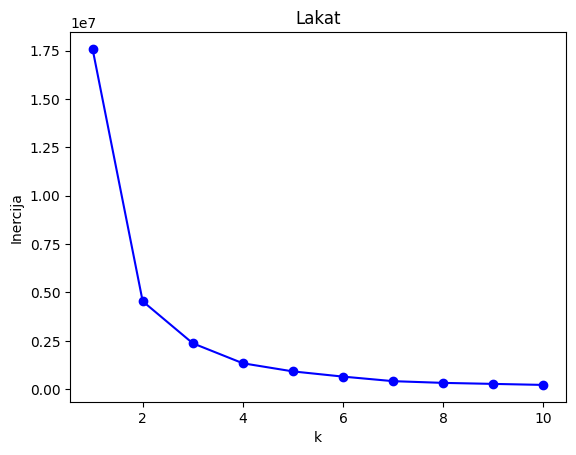

In [10]:
data = wine.copy()

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, "bo-")
plt.xlabel("k")
plt.ylabel("Inercija")
plt.title("Lakat")
plt.show()

Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente te vizualizirajte novostvorene grupe.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


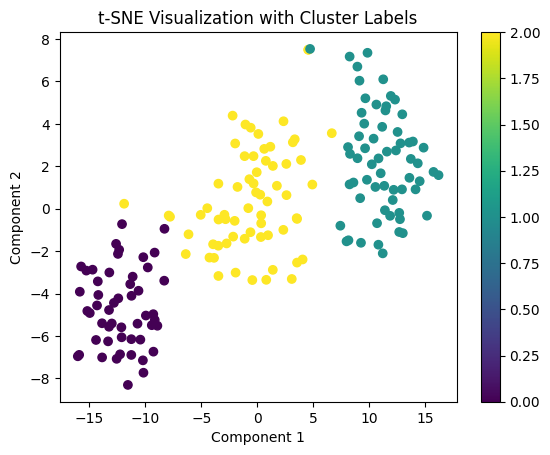

In [11]:
scaler = StandardScaler()
features = data.columns
data[features] = scaler.fit_transform(data[features])

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42).fit(data)
labels = kmeans.predict(data)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("t-SNE Visualization with Cluster Labels")
plt.colorbar()
plt.show()

## **Zadatak 5: Grupiranje pomoću algoritma DBSCAN**

U skupu podataka retci nemaju oznake. Pomoću algoritma DBSCAN grupirajte skup podataka te definirajte nedostajuće oznake. Odaberite prikladan broj grupa.



In [12]:
labels = DBSCAN(eps=2.2).fit_predict(data)
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0 -1
 -1  0 -1 -1  0  0  0  0  0 -1  0  0  0 -1 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1 -1  1]


Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente te vizualizirajte novostvorene grupe.

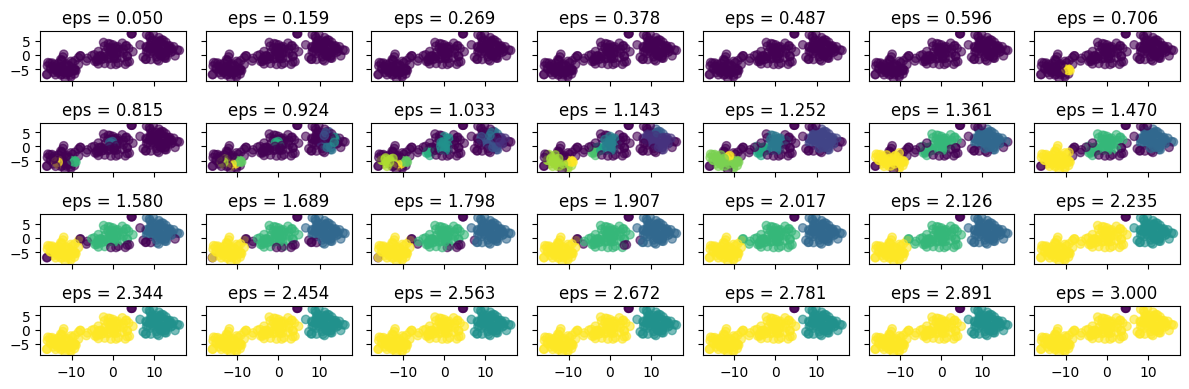

In [13]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data)

eps_list = np.linspace(0.05, 3, 28)

COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS)

fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(12, 4), sharey=True, sharex=True)

for i in range(0, len(eps_list)):
    eps = eps_list[i]
    
    current_column = i%COLUMNS
    current_row = i//COLUMNS
    
    ax = axs[current_row, current_column]
    labels = DBSCAN(eps=eps).fit_predict(X_tsne)
    ax.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, alpha=0.6)
    ax.set_title("eps = {:.3f}".format(eps))
    
plt.tight_layout()